In [43]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
#matriz
df = pd.DataFrame({
    'var1':[1,3,1,2,2,1],
    'var2':[2,4,3,4,3,4],
    'rotulo':[0,1,0,1,1,1]
})

In [45]:
X=df.drop('rotulo',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [46]:
X

,var1,var2
0,1,2
1,3,4
2,1,3
3,2,4
4,2,3
5,1,4


In [47]:
Y = df['rotulo']

In [48]:
Y

0    0
1    1
2    0
3    1
4    1
5    1
Name: rotulo, dtype: int64

In [49]:
X.mean()

var1    1.666667
var2    3.333333
dtype: float64

In [50]:
media_var = np.mean(X, axis=0)

In [51]:
print(media_var)

var1    1.666667
var2    3.333333
dtype: float64


In [52]:
M=X-media_var

In [53]:
print(M)

       var1      var2
0 -0.666667 -1.333333
1  1.333333  0.666667
2 -0.666667 -0.333333
3  0.333333  0.666667
4  0.333333 -0.333333
5 -0.666667  0.666667


In [54]:
C=M.T.dot(M)/(X.shape[0]-1)

In [55]:
C

,var1,var2
var1,0.666667,0.333333
var2,0.333333,0.666667


In [56]:
autovalores,autovetores=np.linalg.eig(C)

In [57]:
print(autovalores)

[1.         0.33333333]


In [58]:
print(autovetores)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [59]:
pares_autovalores=[
    (
    np.abs(autovalores[i]),
    autovetores[:,i]
    )for i in range(len(autovalores))
]
pares_autovalores.sort()
pares_autovalores.reverse()    


In [60]:
pares_autovalores

[(1.0, array([0.70710678, 0.70710678])),
 (0.33333333333333337, array([-0.70710678,  0.70710678]))]

In [61]:
total=sum(autovalores)
var_exp=[
         (i/total)*100 for i in sorted(
             autovalores, reverse=True
         )
]
cum_var_exp=np.cumsum(var_exp)

In [62]:
print(var_exp)

[74.99999999999999, 25.0]


In [63]:
print(cum_var_exp)

[ 75. 100.]


In [64]:
x = [
     'PC %s' %i for i in range(
         1, len(autovalores)+1
     )
]

In [65]:
x

['PC 1', 'PC 2']

In [66]:
df_temp = pd.DataFrame(
    {'auto_valores': autovalores,
    'cum_var_exp': cum_var_exp,
    'var_exp': var_exp,
    'Componente': x}
)

In [67]:
df_temp

,auto_valores,cum_var_exp,var_exp,Componente
0,1.000000,75.0,75.0,PC 1
1,0.333333,100.0,25.0,PC 2


In [68]:
autovetores

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

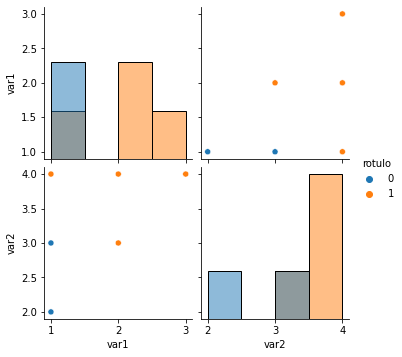

In [69]:
sns.pairplot(df, vars=['var1', 'var2'], hue='rotulo', diag_kind='hist')

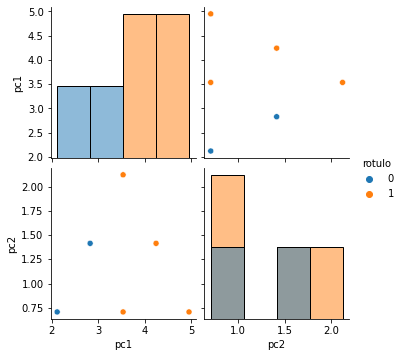

In [70]:
n_componentes=2
autovalores=[p[1] for p in pares_autovalores]
A = autovalores[0:n_componentes]
X = np.dot(X, np.array(A).T)
new_df=pd.DataFrame(X, columns=['pc1', 'pc2'])
new_df['rotulo'] = df['rotulo']
sns.pairplot(new_df, vars=['pc1', 'pc2'], hue='rotulo', diag_kind='hist')
plt.show()

In [71]:
X

array([[2.12132034, 0.70710678],
       [4.94974747, 0.70710678],
       [2.82842712, 1.41421356],
       [4.24264069, 1.41421356],
       [3.53553391, 0.70710678],
       [3.53553391, 2.12132034]])

In [72]:
x

['PC 1', 'PC 2']

In [73]:
from sklearn.decomposition import PCA
df = pd.DataFrame({
    'var1':[1,3,1,2,2,1],
    'var2':[2,4,3,4,3,4],
    'rotulo':[0,1,0,1,1,1]
})
X = df.drop('rotulo', 1)
y = df['rotulo']
pca = PCA(n_components=2)
pca.fit(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


PCA(n_components=2)

In [74]:
print("Auto-valores:")
print(pca.explained_variance_)
print("Auto-vetores:")
print(pca.components_)
print("Variancia explicada:")
print(pca.explained_variance_ratio_)

Auto-valores:
[1.         0.33333333]
Auto-vetores:
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
Variancia explicada:
[0.75 0.25]


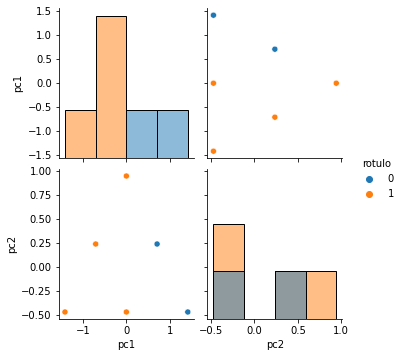

In [75]:
X=pca.transform(X)
new_df=pd.DataFrame(X, columns=['pc1', 'pc2'])
new_df['rotulo'] = df['rotulo']
sns.pairplot(new_df, vars=['pc1', 'pc2'], hue='rotulo', diag_kind='hist')

In [76]:
df = sns.load_dataset('iris')
df.columns=['sepal_length_in_cm', 'sepal_width_in_cm', 'petal_length_in_cm', 'petal_width_in_cm', 'species']
X = df.drop('species', 1)
y= df['species']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [77]:
media_var = np.mean(X, axis=0)
M=X-media_var
C=M.T.dot(M)/(X.shape[0]-1)
autovalores,autovetores=np.linalg.eig(C)
pares_autovalores=[
    (
    np.abs(autovalores[i]),
    autovetores[:,i]
    )for i in range(len(autovalores))
]
pares_autovalores.sort()
pares_autovalores.reverse()  
total=sum(autovalores)
var_exp=[
         (i/total)*100 for i in sorted(
             autovalores, reverse=True
         )
]
cum_var_exp=np.cumsum(var_exp)
x = [
     'PC %s' %i for i in range(
         1, len(autovalores)+1
     )
]
df_temp = pd.DataFrame(
    {'auto_valores': autovalores,
    'cum_var_exp': cum_var_exp,
    'var_exp': var_exp,
    'Componente': x}
)
print(df_temp)
print("Auto-vetores:")
for autovetor in [p[1] for p in pares_autovalores]:
 print(autovetor)
 print()

   auto_valores  cum_var_exp    var_exp Componente
0      4.228242    92.461872  92.461872       PC 1
1      0.242671    97.768521   5.306648       PC 2
2      0.078210    99.478782   1.710261       PC 3
3      0.023835   100.000000   0.521218       PC 4
Auto-vetores:
[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]

[-0.65658877 -0.73016143  0.17337266  0.07548102]

[-0.58202985  0.59791083  0.07623608  0.54583143]

[ 0.31548719 -0.3197231  -0.47983899  0.75365743]



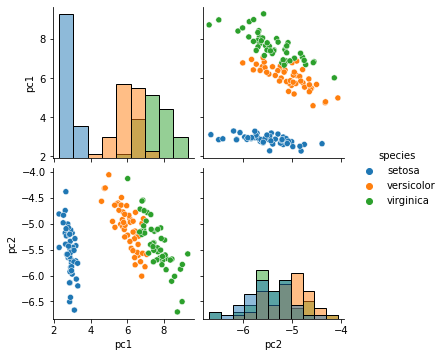

In [78]:
n_componentes=2
autovalores=[p[1] for p in pares_autovalores]
A = autovalores[0:n_componentes]
X = np.dot(X, np.array(A).T)
new_df=pd.DataFrame(X, columns=['pc1', 'pc2'])
new_df['species'] = df['species']
sns.pairplot(new_df, vars=['pc1', 'pc2'], hue='species', diag_kind='hist')
plt.show()

In [79]:
A

[array([ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ]),
 array([-0.65658877, -0.73016143,  0.17337266,  0.07548102])]

In [80]:
df = sns.load_dataset('iris')
df.columns=['sepal_length_in_cm', 'sepal_width_in_cm', 'petal_length_in_cm', 'petal_width_in_cm', 'species']
X = df.drop('species', 1)
y= df['species']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [81]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

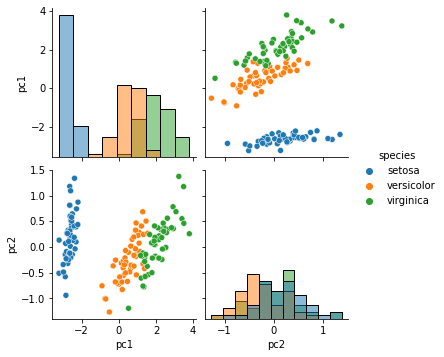

In [82]:
X = pca.transform(X)
new_df = pd.DataFrame(X, columns=['pc1','pc2'])
new_df['species'] = df['species']
sns.pairplot(
new_df, vars = ['pc1','pc2'], hue='species', diag_kind="hist")

In [84]:
X=plt.imread('bird.jpg')

In [85]:
X.shape

(2592, 3888, 3)

In [89]:
pca = PCA(0.99)
lower_dimension_data = pca.fit_transform(X)
lower_dimension_data.shape

ValueError: ignored

In [88]:
def pca_with_var_exp(X, var_exp=0.99):
  pca=PCA(var_exp)
  lower_dimension_data=pca.fit_transform(X)
  print(lower_dimension_data)
  approximation = pca.inverse_transform(lower_dimension_data)
  return approximation

def plot_subplot(X,1):
  plt.subplot(3,2,i)
  plt.imshow(X,)


SyntaxError: ignored